# Monte Carlo Simulation - Logit Model 
## Fabrizio Leone
## 05 - 02 - 2019

In [ ]:
# Import Packages

#import Pkg; Pkg.add("Distributions")
#import Pkg; Pkg.add("LinearAlgebra")
#import Pkg; Pkg.add("Optim")
#import Pkg; Pkg.add("NLSolversBase")
#import Pkg; Pkg.add("Random")
#import Pkg; Pkg.add("Plots")
#import Pkg; Pkg.add("Statistics")

cd("$(homedir())/Documents/GitHub/Econometrics")

using Distributions, LinearAlgebra, Optim, NLSolversBase, Random, Plots, Statistics
Random.seed!(10);

In [18]:
# Define Parameters

N   = 1000;
b   = [0.2, -0.1];
rep = 1000;


In [19]:
# Define logit objective function

function logit_obj(b,y,X,N)
    prob = exp.(X*b) ./ (ones(N,1)+ exp.(X*b))
    l    = log.(y.*prob + (ones(N,1)-y).*(ones(N,1)-prob))        # Likelihood
    s    = y.*(ones(N,1) - prob).*X -((ones(N,1) -y).* prob .*X)  # Gradient
    nll  = -mean(l)
    ns   = -sum!([1. 1.], s)/N
    return nll, ns
end

logit_obj (generic function with 2 methods)

In [ ]:
# Run Monte Carlo Simulation

beta_hat = zeros(N,2)

@time begin
    
for i = 1:rep

# 1. Simulate Data
c    = ones(N,1);
X    = hcat(c, rand(Chisq(10),N,1));
ϵ    = -rand(Logistic(0,1),N,1);
y    = Int.(X*b.>ϵ);
         
# 2. Run optimization     
function objfun(x)
        logit_obj([x[1],x[2]],y,X,N)[1]
end
        
function gradfun!(G,x)
        grad = logit_obj([x[1],x[2]],y,X,N)[2]
        G[1] = grad[1]
        G[2] = grad[2]
end
        
        
        
res  = Optim.optimize(objfun, gradfun!,[0.0, 0.0])
beta_hat[i,:]  = res.minimizer
    
end

end

[0.00544095 0.000547072]


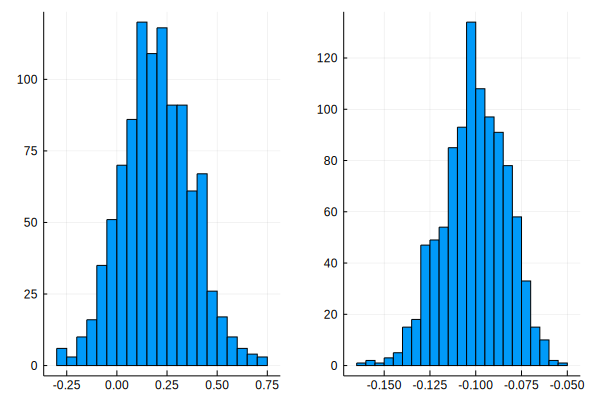

In [17]:
# Show and Plot results

println("Mean Estimates ",sum!([1. 1.], beta_hat)/rep)
println("SE Estimates ", std(beta_hat; mean=nothing, dims=1)/sqrt(N))
h1 = histogram(beta_hat[:,1])
h2 = histogram(beta_hat[:,2])
plot(h1,h2,layout=(1,2),legend=false)
